In [ ]:
#LetsGrowMore Virtual Internship Program (LGMVIP)  [OCT.2021]
#TASK 1: IRIS Flowers Classification ML Project

#Dataset Information

#the data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. one class is linearly
#separable from the other2; the latter are NOT linearly separable from each other.

#Attribute information:
 #   1. sepal length in cm
 #   2. sepal width in cm
 #   3. petal length in cm
 #   4. petal with in cm
 #   5. class:
   #     iris Setosa
   #     Iris Versicolour
   #     iris Virginca


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#loading the data set

df=pd.read_csv('C:\iris.csv')
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
#to display stats about data
df.describe()


,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
# to display number of samples on each class
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [ ]:
#this is a balanced dataset as each class label is having equal data points 

In [12]:
#Processing the dataset
#check for null values
df.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

array([[<AxesSubplot:title={'center':'SepalLength'}>,
        <AxesSubplot:title={'center':'SepalWidth'}>],
       [<AxesSubplot:title={'center':'PetalLength'}>,
        <AxesSubplot:title={'center':'PetalWidth'}>]], dtype=object)

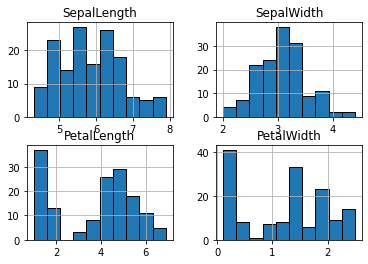

In [13]:
#EXPLORATORY DATA ANALYSIS

df.hist(edgecolor='black')

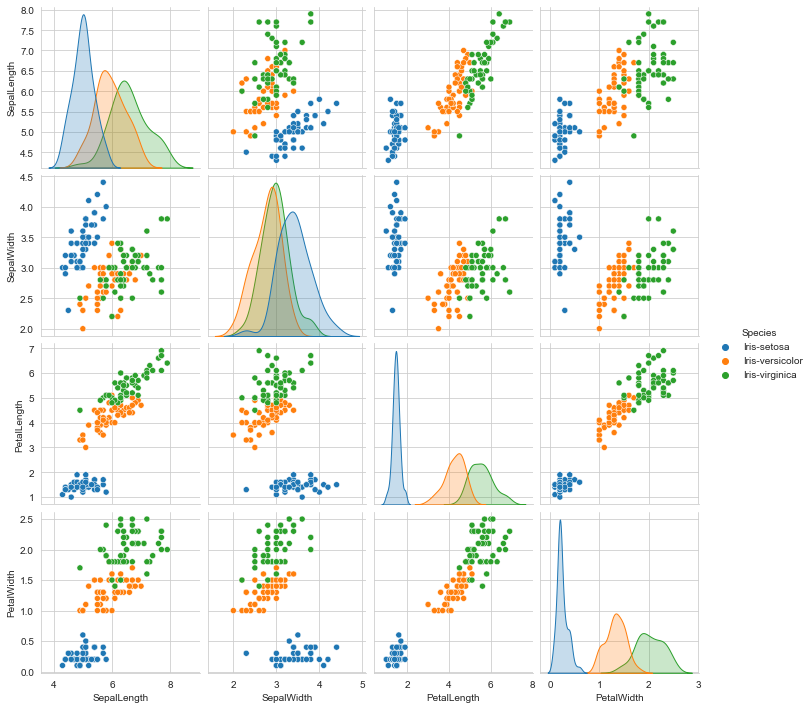

In [20]:
sns.pairplot(df,hue = "Species")

In [ ]:
#Observation
#All type of flowers are well separable for PetalLenght and PetalWidth
#Also all type of bit of well separable for PetalWidth and SepalWidth

In [21]:
# as this is a classification problem, we will use classification algorithms for model building

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

<AxesSubplot:>

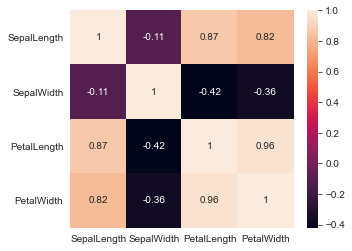

In [23]:
#correlation Matrix
df.corr()

corr1=df.corr()
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr1,annot=True,ax=ax )

In [66]:
df.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.109369,0.871754,0.817954
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544
PetalLength,0.871754,-0.420516,1.000000,0.962757
PetalWidth,0.817954,-0.356544,0.962757,1.000000


In [24]:
#Observation
#PetalLength and PetalWidth : Corr 0.96 : Having highest correlation
#PetalLength and SepalLenght : Corr 0.87 : Having second highest correlation
#PetalWidth and SepalLenght : Corr 0.82 : Having fair enough correlation

#in the above figure, we can see that sepallength and sepalwidth are not correlated,
#while the petallength and petalwidth are highly correlated

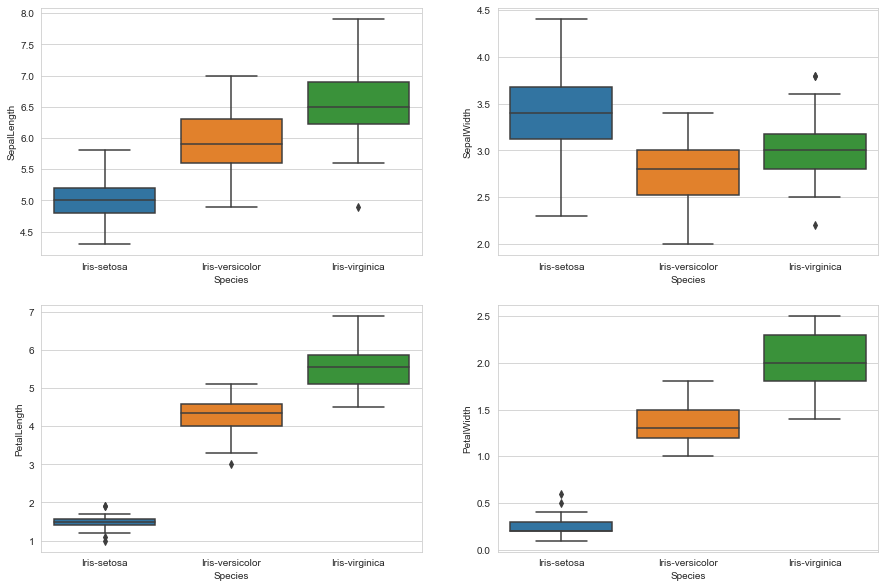

In [57]:
fig, axis = plt.subplots(2, 2, figsize=(15,10))

sns.boxplot(x='Species', y='SepalLength', data=df, ax=axis[0,0])
sns.boxplot(x='Species', y='SepalWidth', data=df, ax=axis[0,1])
sns.boxplot(x='Species', y='PetalLength', data=df, ax=axis[1,0])
sns.boxplot(x='Species', y='PetalWidth', data=df, ax=axis[1,1])

plt.show()

In [ ]:
#Iris-setosa : It's usually having smaller features except SepalWidth
#Iris-versicolor : It's having average features
#Iris-virginica : It's having bigger features except SepalWidth

<AxesSubplot:xlabel='Species', ylabel='PetalWidth'>

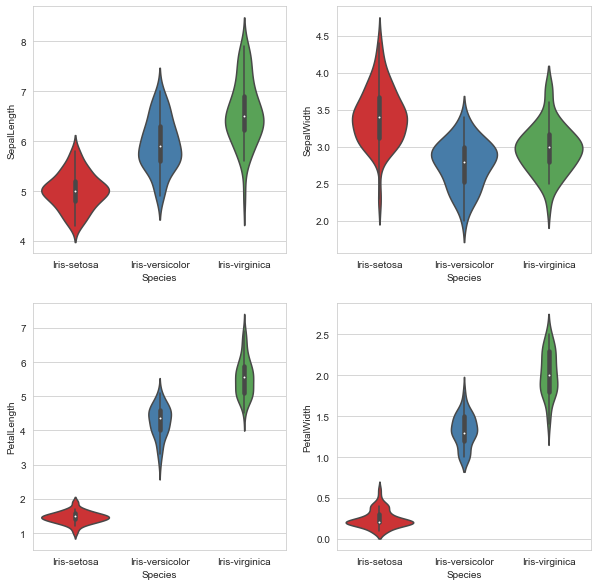

In [30]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.violinplot(data=df, x='Species',y='SepalLength',palette='Set1')
plt.subplot(2,2,2)
sns.violinplot(data=df, x='Species',y='SepalWidth',palette='Set1')

plt.subplot(2,2,3)
sns.violinplot(data=df,x='Species', y='PetalLength',palette='Set1')
plt.subplot(2,2,4)
sns.violinplot(data=df, x='Species', y='PetalWidth',palette='Set1')

In [ ]:
#Conclusion
#Data is balanced
#Strong correlation between PetalLenght and PetalWith
#Iris-Setos is easily separable from other flowers, even using single feature
#Iris-versicolor and Iris-virginica are difficult to seperate just using single feature

In [31]:
#we will use all the features to train the algorithm and check the accuracy
#splitting data into train and test set

X = df[['SepalLength','SepalWidth','PetalLength','PetalWidth']]
y = df['Species']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [34]:
X_train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2


In [36]:
#Logistic Regression
model = LogisticRegression()
model.fit(X_train,y_train)

prediction = model.predict(X_test)
print('Logistic Regression accuracy = ', metrics.accuracy_score(prediction,y_test))

Logistic Regression accuracy =  0.9777777777777777


In [37]:
#Support vector Machine (SVM)
model = svm.SVC()
model.fit(X_train,y_train)

prediction = model.predict(X_test)
print('SVM accuracy = ', metrics.accuracy_score(prediction,y_test))

SVM accuracy =  0.9777777777777777


In [38]:
#Decision tree
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

prediction = model.predict(X_test)
print('Decision Tree accuracy = ', metrics.accuracy_score(prediction,y_test))

Decision Tree accuracy =  0.9777777777777777


In [39]:
#K-Nearest Neighbors (KNN)
model = KNeighborsClassifier()
model.fit(X_train,y_train)

prediction = model.predict(X_test)
print('KNN accuracy = ', metrics.accuracy_score(prediction,y_test))

KNN accuracy =  0.9777777777777777


In [ ]:
#CONCLUSION: By applying the above 4 Machine Learning algorithms, we see that all our models give the exact same High Accuracy.

In [ ]:
#We will use "Sepal and Petal features separately" to Train the algorithm and Check the accuracy.
#Splitting the Sepal data and Petal data into Train and Test set

In [60]:
sepal_x = df[['SepalLength','SepalWidth']]
sepal_y = df['Species']

sepal_x_train, sepal_x_test, sepal_y_train, sepal_y_test = train_test_split(sepal_x, sepal_y, test_size=0.3,random_state=0)

In [61]:
petal_x = df[['PetalLength','PetalWidth']]
petal_y = df['Species']

petal_x_train, petal_x_test, petal_y_train, petal_y_test = train_test_split(petal_x, petal_y, test_size=0.3,random_state=0)

In [62]:
#Logistic Regression
model = LogisticRegression()

model.fit(sepal_x_train,sepal_y_train)

prediction = model.predict(sepal_x_test)
print('Logistic Regression accuracy for Sepal = ', metrics.accuracy_score(prediction,sepal_y_test))

model.fit(petal_x_train,petal_y_train)

prediction = model.predict(petal_x_test)
print('Logistic Regression accuracy for Petal = ', metrics.accuracy_score(prediction,petal_y_test))

Logistic Regression accuracy for Sepal =  0.8222222222222222
Logistic Regression accuracy for Petal =  0.9777777777777777


In [63]:
#Support vector machine (SVM)
model = svm.SVC()

model.fit(sepal_x_train,sepal_y_train)

prediction = model.predict(sepal_x_test)
print('SVM accuracy for Sepal = ', metrics.accuracy_score(prediction,sepal_y_test))

model.fit(petal_x_train,petal_y_train)

prediction = model.predict(petal_x_test)
print('SVM accuracy for Petal = ', metrics.accuracy_score(prediction,petal_y_test))

SVM accuracy for Sepal =  0.8
SVM accuracy for Petal =  0.9777777777777777


In [64]:
#decision tree
model = DecisionTreeClassifier()

model.fit(sepal_x_train,sepal_y_train)

prediction = model.predict(sepal_x_test)
print('Decision Tree accuracy for Sepal = ', metrics.accuracy_score(prediction,sepal_y_test))

model.fit(petal_x_train,petal_y_train)

prediction = model.predict(petal_x_test)
print('Decision Tree accuracy for Petal = ', metrics.accuracy_score(prediction,petal_y_test))

Decision Tree accuracy for Sepal =  0.6444444444444445
Decision Tree accuracy for Petal =  0.9555555555555556


In [65]:
#K-nearest neighbors (KNN)
model = KNeighborsClassifier()

model.fit(sepal_x_train,sepal_y_train)

prediction = model.predict(sepal_x_test)
print('KNN accuracy for Sepal = ', metrics.accuracy_score(prediction,sepal_y_test))

model.fit(petal_x_train,petal_y_train)

prediction = model.predict(petal_x_test)
print('KNN accuracy for Petal = ', metrics.accuracy_score(prediction,petal_y_test))

KNN accuracy for Sepal =  0.7333333333333333
KNN accuracy for Petal =  0.9777777777777777


In [ ]:
#CONCLUSION :
#The accuracy is 97.7%.